In [2]:
from ase.io import read
from ase.geometry.analysis import Analysis

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d

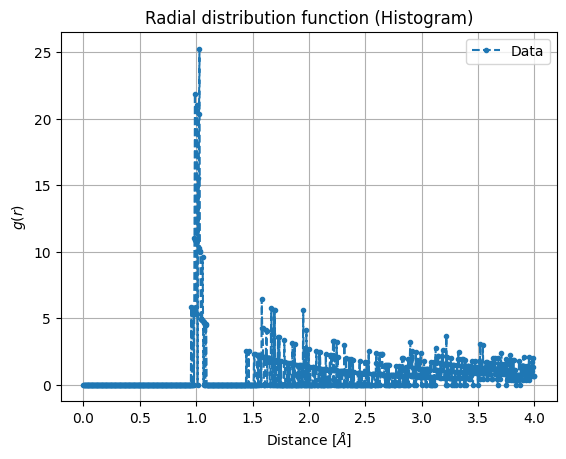

Coordination number = 3.3877214129371334.


In [6]:
# Plotting RDF with ASE's built-in method:
r_max = 4
n_points = 1000
atoms = read(f'Snapshot_12000/Task1_Dynamics.traj')
analysis = Analysis(atoms)
rdf = analysis.get_rdf(r_max, n_points, elements = ['Na', 'O', 'H'])
x = np.linspace(0, r_max, n_points, endpoint = True)

# Nearest: 'interp1d'
# Interp = interp1d(x, rdf[0])
# ynew = Interp(x)

# CubicSpline:
Interp = CubicSpline(x, rdf[0])
ynew = Interp(x, 0)

plt.plot(x, rdf[0], marker = '.', linestyle = '--', label = 'Data')
# plt.plot(x, ynew, label = 'Interpolation (CubicSpline)')
plt.xlabel(r'Distance [$\AA$]')
plt.ylabel(r'$g(r)$')
plt.title(f'Radial distribution function (Histogram)')
plt.grid(True)
plt.legend()
plt.show()

# First attempt at integrating. Clearly not working yet.
h = r_max/n_points
print(f'Coordination number = {np.trapz(rdf[0], dx = h)}.') # This is integrating everything! Not just until the first minimum, or whatever it was.

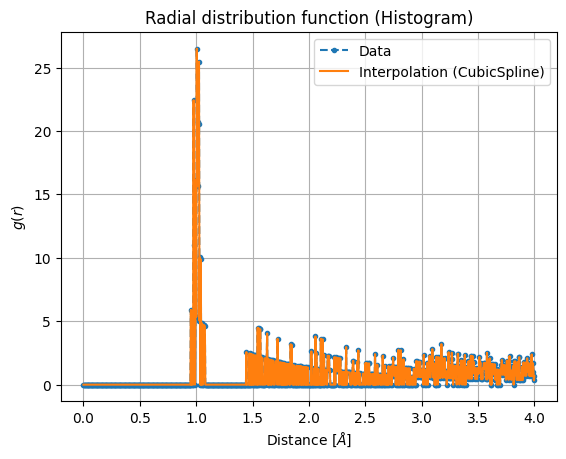

Coordination number = 3.335216312036093.


In [4]:
# Plotting RDF with ASE's built-in method: (Comparison with the given .traj file)
r_max = 4
atoms = read(f'../../TIF_320/tif320-computational-materials-and-molecular-physics/Na-aimd/NaCluster24.traj')
analysis = Analysis(atoms)
rdf = analysis.get_rdf(r_max, 1000)

# CubicSpline:
Interp = CubicSpline(x, rdf[0])
ynew = Interp(x, 0)

plt.plot(np.linspace(0, r_max, 1000, endpoint = True), rdf[0], marker = '.', linestyle = '--', label = 'Data')
plt.plot(x, ynew, label = 'Interpolation (CubicSpline)')
plt.xlabel(r'Distance [$\AA$]')
plt.ylabel(r'$g(r)$')
plt.title(f'Radial distribution function (Histogram)')
plt.grid(True)
plt.legend()
plt.show()

# First attempt at integrating. Clearly not working yet.
h = r_max/n_points
print(f'Coordination number = {np.trapz(rdf[0], dx = h)}.') # This is integrating everything! Not just until the first minimum, or whatever it was.